# Import Library

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets                             

# Read Data and Preprocessing

- Data info  
- PassengerId : Unique ID of passenger  
- Survived : 0 = No, 1 = Yes  
- pclass : Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)  
- sibsp : # of siblings & spouses aboard the Titanic  
- parch : # of parents / children aboard the Titanic  
- ticket : Ticket number  
- cabin : Cabin number  
- embarked : Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  

In [2]:
data_df = pd.read_csv('titanic.csv')
temp_y = data_df[['Survived']]
del data_df['Survived']
temp_x = data_df.copy()


In [3]:

data_df = pd.read_csv('titanic.csv')
y_dat = data_df[['Survived']]
del data_df['Survived']

x_dat = data_df.copy()

del x_dat['PassengerId']
del x_dat['Name']
del x_dat['Ticket']
del x_dat['Cabin']
del x_dat['Embarked']

#del x_dat['Fare']

x_dat['Sex']=x_dat['Sex'].apply(lambda x: 0 if "female" in x else 0)


In [4]:
md_age = x_dat['Age'].median(skipna=True)
x_dat['Age'] = x_dat['Age'].fillna(md_age) # or .fillna(int/float/str 값)

In [5]:
#mean_age = x_dat['Age'].mean(skipna=True)
#x_dat['Age'] = x_dat['Age'].fillna(mean_age)

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()

x_dat['Fare']=scaler.fit_transform(x_dat[['Fare']])
x_dat['Age']=scaler.fit_transform(x_dat[['Age']])

#x_dat['Age']=MinMaxScaler().fit_transform(x_dat[['Age']])

In [7]:
x_data = np.array(x_dat)
y_data = np.array(y_dat)

In [8]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.30, random_state=0)

# PCA Analysis

In [9]:
from sklearn import decomposition
from sklearn import datasets

dmodel = decomposition.PCA(n_components=0.97) # Explains 97% of total variance

x_dt = x_data.copy()
dmodel.fit(x_dt)
x_d = dmodel.transform(x_dt)

In [10]:
print(dmodel.explained_variance_ratio_)
print(np.argmax(np.cumsum(dmodel.explained_variance_ratio_) >= 0.97 ) + 1)

[0.35181484 0.32182483 0.15948981 0.10059447 0.06627606]
5


In [11]:
modelp = decomposition.PCA(n_components=3)

x_pt=x_data.copy()
modelp.fit(x_pt)
x_p = modelp.transform(x_pt)


In [12]:
print(modelp.explained_variance_ratio_)
print(np.sum(modelp.explained_variance_ratio_))

[0.35181484 0.32182483 0.15948981]
0.8331294777381691


In [13]:
y_li=y_data.reshape(891,)

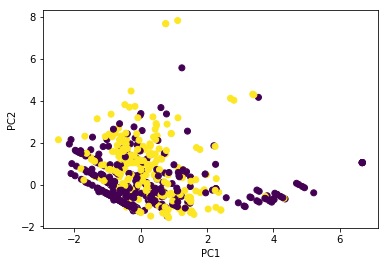

In [14]:
plt.scatter(x_p[:, 0], x_p[:, 1], c=y_li)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

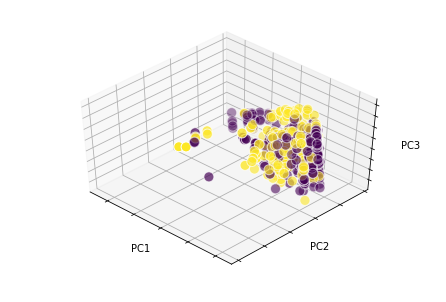

In [15]:
# PCA plot of 3 PCs
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134) # Set the elevation and azimuth of the axes. (축의 고도와 방위각)

ax.scatter(x_p[:, 0], x_p[:, 1], x_p[:, 2], c=y_li, edgecolor='w', s=100)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.dist = 12 # 값이 커지면 전체 plot 이 작아짐

plt.show()

# DecisionTree and AdaBoost

In [29]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

tree=DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=2)
ada=AdaBoostClassifier(base_estimator=tree,n_estimators=1500, learning_rate=0.02, random_state=0)

tree=tree.fit(x_train, y_train)
y_train_pred=tree.predict(x_train)
y_test_pred=tree.predict(x_test)

tree_train=accuracy_score(y_train, y_train_pred)
tree_test=accuracy_score(y_test, y_test_pred)

print('DTree_train_score',tree_train)
print('DTree_test_score', tree_test,'\n')

ada=ada.fit(x_train, y_train)
y_train_pred_ad=ada.predict(x_train)
y_test_pred_ad=ada.predict(x_test)

ada_train=accuracy_score(y_train, y_train_pred_ad)
ada_test=accuracy_score(y_test, y_test_pred_ad)

print('Ada_train_score',ada_train)
print('Ada_test_score', ada_test)


DTree_train_score 0.7046548956661316
DTree_test_score 0.7089552238805971 

Ada_train_score 0.8362760834670947
Ada_test_score 0.746268656716418


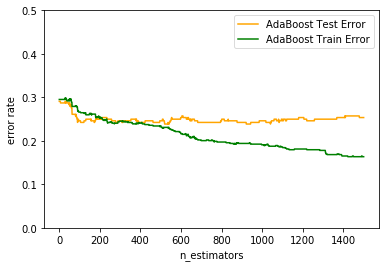

In [17]:
from sklearn.metrics import zero_one_loss

n_estimators=1500

ada_real_err = np.zeros((n_estimators))
for i, y_pred in enumerate(ada.staged_predict(x_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators))
for i, y_pred in enumerate(ada.staged_predict(x_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='AdaBoost Train Error',
        color='green')

ax.set_ylim((0.0, 0.5))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

# GradientBoostingClassifier

In [18]:
params = {'n_estimators': 500, 'max_depth': 3, 'min_samples_split': 2,
          'learning_rate': 0.01, 'random_state':0, 'subsample':1.0, }

clf = GradientBoostingClassifier(**params)


In [19]:
clf.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [20]:
print('train_score:',clf.score(x_train,y_train))
print('test_score:',clf.score(x_test,y_test))


train_score: 0.7736757624398074
test_score: 0.7649253731343284


# Confusion Matrix, Classification Report

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

gb_clf2 = GradientBoostingClassifier(**params)
gb_clf2.fit(x_train, y_train)
predictions = gb_clf2.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix:
[[148  20]
 [ 43  57]]
Classification Report
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       168
           1       0.74      0.57      0.64       100

   micro avg       0.76      0.76      0.76       268
   macro avg       0.76      0.73      0.73       268
weighted avg       0.76      0.76      0.76       268



# ROC curve and AUC

In [22]:
from sklearn.metrics import roc_curve, auc

y_pred_clf = clf.predict_proba(x_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_clf)

print(auc(fpr_grd,tpr_grd))

0.7961904761904762


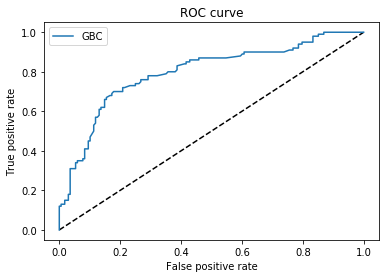

AUC: 0.7961904761904762


In [28]:
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_grd, tpr_grd, label='GBC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

print('AUC:',auc(fpr_grd,tpr_grd))

# Feature Importance

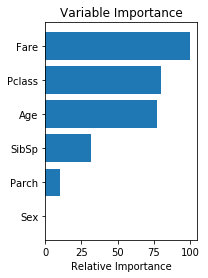

In [25]:
# Plot feature importance

feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

xx=(x_dat.columns[sorted_idx])

pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos,xx)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()